In [123]:
import pandas as pd
pd.set_option('display.max_columns', 60)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/bsmrvl/Unit-1-Build/master/ABIII_English.csv', dtype='str')
print(df.shape)

(14809, 296)


In [131]:
df['qid'].value_counts().head(20)

1077    11
278     11
639     11
387     11
868     11
922     11
599     11
1085    11
275     11
33      11
625     11
235     11
86      11
588     11
695     11
9       11
404     11
650     11
237     11
843     11
Name: qid, dtype: int64

In [132]:
df = df.reset_index().drop('qid', axis=1).rename(columns={'index':'qid'})
df.head()

,qid,bid,country,date,wt,form,samp,a1,q1,q13,v13,sex,q101,q102,q102_insh,q102a,q103,q103_insh,q104,q104_insh,q105,q105_insh,q105a,q106,q2011,q2013,q2014,q2016,q2017,q20112,...,q1001,q1002,q1003,q1003t,q1003yem,q1004,q1005,q1006,q1006a,q1007,q1007a,q1009,q1010,q1011,q1011a,q1011b,q1012,q1012a,q1013,q1014,q1015,q1016,q1017,q1019_1,q1019_2,q1020jo,q2001ir,q2003,q2004ir,q2005kw
0,0,1,Algeria,31 Mar 13,.8432402610778809,Form B,Main sample,South,Laghouat,Urban,NaN,Male,Very good,Much better,Yes,Much worse,Most people are not trustworthy,No,"Yes, for economic and political reasons",No,Fully ensured,No,Same as last year,To a limited extent,I trust it to a medium extent,I absolutely do not trust it,I trust it to a medium extent,I trust it to a medium extent,I trust it to a great extent,I trust it to a medium extent,...,40,Male,Prepartory/Basic,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Private,NaN,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,NaN,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN,NaN,NaN
1,1,1,Algeria,31 Mar 13,.6745921969413757,Form A,Main sample,South,Laghouat,Urban,NaN,Female,Good,Somewhat better,Yes,Don't know,Most people are not trustworthy,No,Refuse,No,Not ensured,No,Worse than last year,To a limited extent,I absolutely do not trust it,I absolutely do not trust it,I trust it to a medium extent,I trust it to a great extent,I absolutely do not trust it,I absolutely do not trust it,...,41,Female,Mid-level diploma (professional or technical,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Public,A governmental employee,NaN,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,NaN,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh,NaN,NaN,NaN,NaN,NaN
2,2,1,Algeria,31 Mar 13,.8432402610778809,Form A,Main sample,South,Laghouat,Urban,NaN,Male,Bad,Somewhat better,Yes,Similar,Most people are not trustworthy,No,"No, I do not think about emigrating",No,Absolutely not ensured,No,Worse than last year,Don't know,I absolutely do not trust it,I absolutely do not trust it,I trust it to a great extent,I trust it to a great extent,I absolutely do not trust it,I absolutely do not trust it,...,44,Male,Elementary,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Public,A governmental employee,NaN,Pension at the conclusion of service,Bachelor,NaN,Yes,Yes,Muslim,NaN,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN,NaN,NaN
3,3,1,Algeria,31 Mar 13,1.011888265609741,Form B,Main sample,South,Laghouat,Urban,NaN,Female,Good,Almost the same as the current situation,No,Similar,Most people are not trustworthy,No,"Yes, for economic and political reasons",No,Ensured,No,Same as last year,To a great extent,I trust it to a medium extent,I trust it to a great extent,I trust it to a great extent,I trust it to a great extent,I trust it to a great extent,I absolutely do not trust it,...,56,Female,Elementary,NaN,NaN,No,A housewife,NaN,NaN,NaN,NaN,NaN,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,NaN,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN,NaN,NaN
4,4,1,Algeria,31 Mar 13,1.011888265609741,Form B,Main sample,South,Laghouat,Urban,NaN,Male,Good,Somewhat better,No,Similar,Most people are not trustworthy,No,"No, I do not think about emigrating",No,Fully ensured,No,Better than last year,To a great extent,I trust it to a limited extent,I trust it to a medium extent,I trust it to a medium extent,I trust it to a medium extent,I trust it to a limited extent,I trust it to a medium extent,...,48,Male,Elementary,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Private,NaN,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,NaN,Owned,24000,34000,Our househol

In [133]:
df_personal = pd.concat([df['qid'], df.loc[:,'q1001':'q2003']], axis=1)

df_personal = df_personal.rename(columns={'q1001':'age', 
                                          'q1002':'sex', 
                                          'q1004':'work?', 
                                          'q1005':'work_alt', 
                                          'q1006':'full/part',
                                          'q1006a':'sector', 
                                          'q1007':'position_public',
                                          'q1007a':'position_private', 
                                          'q1009':'unemployment',
                                          'q1010':'mar_status', 
                                          'q1011':'spouse_job',
                                          'q1011a':'computer',
                                          'q1011b':'car', 
                                          'q1012':'religion', 
                                          'q1012a':'denomination',
                                          'q1013':'housing',
                                          'q1014':'income', 
                                          'q1015':'household_income', 
                                          'q1016':'income_enough', 
                                          'q1017':'remittances',
                                          'q1019_1':'1st_language', 
                                          'q1019_2':'2nd_language',
                                          'q2003':'appearance'})
df_personal.head()

,qid,age,sex,q1003,q1003t,q1003yem,work?,work_alt,full/part,sector,position_public,position_private,unemployment,mar_status,spouse_job,computer,car,religion,denomination,housing,income,household_income,income_enough,remittances,1st_language,2nd_language,q1020jo,q2001ir,appearance
0,0,40,Male,Prepartory/Basic,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Private,NaN,Private sector employee,The job does not provide anything at the concl...,Married,Housewife,No,Yes,Muslim,NaN,Owned,19000,38000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN
1,1,41,Female,Mid-level diploma (professional or technical,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Public,A governmental employee,NaN,Pension at the conclusion of service,Married,"Professional such as lawyer, accountant, teach...",Yes,Yes,Muslim,NaN,Rented,Refuse,Refuse,Refuse,Refuse,Arabic,Amazigh,NaN,NaN,NaN
2,2,44,Male,Elementary,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Public,A governmental employee,NaN,Pension at the conclusion of service,Bachelor,NaN,Yes,Yes,Muslim,NaN,Other,20000,30000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN
3,3,56,Female,Elementary,NaN,NaN,No,A housewife,NaN,NaN,NaN,NaN,NaN,Married,"Professional such as lawyer, accountant, teach...",Yes,No,Muslim,NaN,Owned,Don't know,57000,Our household income does not cover our expens...,We do not receive anything,Arabic,Amazigh,NaN,NaN,NaN
4,4,48,Male,Elementary,NaN,NaN,Yes,NaN,Full time (30 hours or more a week),Private,NaN,Private sector employee,End of service gratuity,Married,Housewife,No,Yes,Muslim,NaN,Owned,24000,34000,Our household income does not cover our expens...,We do not receive anything,Arabic,Does not speak second language,NaN,NaN,NaN


In [134]:
df_personal = df_personal.replace({np.NaN:'', 'Missing':''})

df_personal['occupation'] = df_personal['work_alt'] + df_personal['position_public'] + df_personal['position_private']
df_personal = df_personal.drop(['work_alt','full/part','sector','position_public','position_private'], axis=1)

df_personal['education'] = df_personal['q1003'] + df_personal['q1003t'] + df_personal['q1003yem']
df_personal = df_personal.drop(['q1003','q1003t','q1003yem'], axis=1)

df_personal = df_personal.drop(['unemployment','religion','denomination',
                                'income_enough','remittances','1st_language',
                                '2nd_language','q1020jo','q2001ir','appearance'], axis=1)

df_personal = df_personal[['qid','age','sex','education','work?','occupation',
                           'mar_status','spouse_job','housing','car',
                           'computer','income','household_income']]

df_personal.head()

,qid,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income
0,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000,38000
1,1,41,Female,Mid-level diploma (professional or technical,Yes,A governmental employee,Married,"Professional such as lawyer, accountant, teach...",Rented,Yes,Yes,Refuse,Refuse
2,2,44,Male,Elementary,Yes,A governmental employee,Bachelor,,Other,Yes,Yes,20000,30000
3,3,56,Female,Elementary,No,A housewife,Married,"Professional such as lawyer, accountant, teach...",Owned,No,Yes,Don't know,57000
4,4,48,Male,Elementary,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,24000,34000


In [135]:
df_personal['education'].value_counts()

Secondary                                       3192
Prepartory/Basic                                2831
Elementary                                      2398
ba                                              2363
Illiterate/No formal education                  2148
Mid-level diploma (professional or technical    1439
MA and above                                     247
Mid-level diploma/professional or technical)     101
Pre-high school diploma                           56
Refuse                                            29
                                                   5
Name: education, dtype: int64

In [136]:
df_personal['education'] = df_personal['education'].replace({'Mid-level diploma/professional or technical)':
                                                            'Mid-level diploma (professional or technical',
                                                            'Pre-high school diploma':'Prepartory/Basic',
                                                            'ba':'BA'})
df_personal['education'].value_counts()

Secondary                                       3192
Prepartory/Basic                                2887
Elementary                                      2398
BA                                              2363
Illiterate/No formal education                  2148
Mid-level diploma (professional or technical    1540
MA and above                                     247
Refuse                                            29
                                                   5
Name: education, dtype: int64

In [359]:
ed_cats = pd.Categorical(df_personal['education'], categories=['Refuse',
                                                                               '',
                                                                               'Illiterate/No formal education',
                                                                               'Elementary',
                                                                               'Prepartory/Basic',
                                                                               'Secondary',
                                                                               'Mid-level diploma (professional or technical',
                                                                               'BA',
                                                                               'MA and above'], ordered=True)

df_personal['education'] = ed_cats

In [138]:
df_personal['occupation'].value_counts()

A housewife                                                           4133
A governmental employee                                               2165
Unemployed                                                            1757
A student                                                             1317
Private sector employee                                                940
Retired                                                                843
Owner of a shop/grocery store                                          724
Manual laborer                                                         568
Craftsperson                                                           408
Working at the armed forces or the police                              360
                                                                       341
Professional such as lawyer, accountant, teacher, doctor, etc.         280
Agricultural worker/Owner of a farm                                    243
Employer/director of an i

In [139]:
print(sorted(df_personal['income'].unique(), reverse=True)[0:6])
print(sorted(df_personal['household_income'].unique(), reverse=True)[0:6])

['Refuse', 'Not specified', 'No income', "Don't know", '9900', '99']
['Refuse', 'Not specified', 'No income', "Don't know", '9900', '990']


In [140]:
df_personal[['income','household_income']] = df_personal[['income','household_income']].replace({'No income':'0',
                                                                                            'Refuse':np.NaN,
                                                                                            'Not specified':np.NaN,
                                                                                            'Don\'t know':np.NaN,
                                                                                            '':np.NaN}).astype('float')

df_personal.head()

,qid,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income
0,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0
1,1,41,Female,Mid-level diploma (professional or technical,Yes,A governmental employee,Married,"Professional such as lawyer, accountant, teach...",Rented,Yes,Yes,NaN,NaN
2,2,44,Male,Elementary,Yes,A governmental employee,Bachelor,,Other,Yes,Yes,20000.0,30000.0
3,3,56,Female,Elementary,No,A housewife,Married,"Professional such as lawyer, accountant, teach...",Owned,No,Yes,NaN,57000.0
4,4,48,Male,Elementary,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,24000.0,34000.0


In [141]:
df_personal = df_personal.replace({'':np.NaN, 'Don\'t know':np.NaN,
                                  'Refuse':np.NaN})
df_personal.isnull().sum()

qid                    0
age                   10
sex                    0
education             34
work?                 16
occupation           501
mar_status            14
spouse_job          5456
housing              103
car                   50
computer              48
income              4835
household_income    2699
dtype: int64

In [142]:
df_personal = pd.concat([df_personal, df.loc[:,'q800a':'q800c']], axis=1).rename(columns={'q800a':
                                                                                         'participate',
                                                                                         'q800b':
                                                                                         'why_par',
                                                                                         'q800c':
                                                                                         'why_not_par'})

df_personal.head()

,qid,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income,participate,why_par,why_not_par
0,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
1,1,41,Female,Mid-level diploma (professional or technical,Yes,A governmental employee,Married,"Professional such as lawyer, accountant, teach...",Rented,Yes,Yes,NaN,NaN,"No, I did not",NaN,I did not care to participate / It was not imp...
2,2,44,Male,Elementary,Yes,A governmental employee,Bachelor,NaN,Other,Yes,Yes,20000.0,30000.0,"No, I did not",NaN,Refuse
3,3,56,Female,Elementary,No,A housewife,Married,"Professional such as lawyer, accountant, teach...",Owned,No,Yes,NaN,57000.0,"No, I did not",NaN,I was afraid to participate in these demonstra...
4,4,48,Male,Elementary,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,24000.0,34000.0,"No, I did not",NaN,I did not know how to participate in these dem...


In [143]:
df_personal['qid'] = df_personal['qid'].astype('int64')

In [144]:
df_quant = pd.concat([df['qid'], 
                     df.loc[:,'q6012':'q6014'],
                     df.loc[:,'q6041':'q6045'],
                     df.loc[:,'q6051':'q6056'],
                     df.loc[:,'q605b1':'q6087'],
                     df.loc[:,'q6101':'q6106'],
                     df.loc[:,'q800d1':'q810a'],
                     df.loc[:,'q812a1':'q812a8']], axis=1)

df_quant.head()

,qid,q6012,q6013,q6014,q6041,q6043,q6045,q6051,q6052,q6053,q6054,q6055,q6056,q605b1,q605b2,q6061,q6062,q6063,q6064,q6065,q6066,q6071,q6072,q6073,q6074,q6076,q6082,q6087,q6101,q6105,q6106,q800d1,q800d2,q800d3,q800d4,q800d5,q800d6,q800d7,q800d8,q800d9,q810a,q812a1,q812a2,q812a3,q812a4,q812a5,q812a6,q812a7,q812a8
0,0,I strongly agree,I strongly agree,I somewhat disagree,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a limited extent,Does not constitute an obstacle whatsoever,I strongly agree,I somewhat agree,I somewhat disagree,I strongly agree,I somewhat agree,I strongly agree,I strongly support,I somewhat support,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I strongly agree,I somewhat disagree,I somewhat disagree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,Always,Always,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal loss,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important
1,1,I somewhat disagree,I strongly agree,I somewhat disagree,Constitutes an obstacle to a limited extent,Constitutes an obstacle to a limited extent,Constitutes an obstacle to a limited extent,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly agree,I strongly support,I strongly support,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,Don't know,Don't know,Always,Most of the time,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal loss,Very important,Very important,Very important,Very important,Not that important,Not that important,Very important,Very important
2,2,I somewhat agree,I somewhat agree,I strongly disagree,Constitutes an obstacle to a great extent,Constitutes an obstacle to a limited extent,Constitutes an obstacle to a limited extent,I somewhat disagree,I somewhat agree,I somewhat agree,I somewhat disagree,I somewhat agree,I somewhat agree,I strongly support,Don't know,I somewhat agree,I somewhat disagree,I somewhat disagree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat disagree,I somewhat disagree,I somewhat disagree,I somewhat disagree,I somewhat disagree,Don't know,Don't know,Refuse,Refuse,Refuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal loss,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not important at all,Not important at all,Very important,Very important
3,3,I strongly agree,I somewhat agree,I strongly disagree,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a medium extent,I strongly agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I strongly agree,I strongly support,Don't know,I somewhat agree,Don't know,I strongly agree,I strongly agree,I strongly agree,I strongly agree,Don't know,I somewhat agree,I strongly agree,I strongly agree,I somewhat disagree,I strongly agree,I strongly agree,Always,Rarely,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal victory,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important
4,4,I somewhat disagree,I strongly agree,I somewhat agree,Constitutes an obstacle to a medium extent,Constitutes an obstacle to a medium extent,Does not constitute an obstacle whatsoever,Don't know,I strongly agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat agree,I somewhat support,I do not support,I somewhat agree,I strongly disagree,I strongly disagree,I strongly agree,I somewhat agree,I somewhat agree,I somewhat disagree,I somewhat disagree,I somewhat agree,I somewhat agree,I strongly agree,I somewhat agree,I somewhat agree,Always,Always,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More of personal victory,Not th

In [145]:
df_quant = df_quant.replace({'I strongly disagree':'-2',
                            'I somewhat disagree':'-1',
                            'I somewhat agree':'1',
                            'I strongly agree':'2',
                            'Does not constitute an obstacle whatsoever':'-2',
                            'Constitutes an obstacle to a limited extent':'-1',
                            'Constitutes an obstacle to a medium extent':'1',
                            'Constitutes an obstacle to a great extent':'2',
                            'I strongly do not support':'-2',
                            'I do not support':'-1',
                            'I somewhat support':'1',
                            'I strongly support':'2',
                            'Never':'-2',
                            'Rarely':'-1',
                            'Sometimes':'0',
                            'Most of the time':'1',
                            'Always':'2',
                            'No':'-1',
                            'Yes':'1',
                            'More of personal loss':'-1',
                            'Difficult to define':'0',
                            'More of personal victory':'1',
                            'Not important at all':'-2',
                            'Not that important':'-1',
                            'Somewhat important':'1',
                            'Very important':'2',
                            'Don\'t know':np.NaN,
                            'Refuse':np.NaN,
                            'Missing':np.NaN})

df_quant.head(10)

,qid,q6012,q6013,q6014,q6041,q6043,q6045,q6051,q6052,q6053,q6054,q6055,q6056,q605b1,q605b2,q6061,q6062,q6063,q6064,q6065,q6066,q6071,q6072,q6073,q6074,q6076,q6082,q6087,q6101,q6105,q6106,q800d1,q800d2,q800d3,q800d4,q800d5,q800d6,q800d7,q800d8,q800d9,q810a,q812a1,q812a2,q812a3,q812a4,q812a5,q812a6,q812a7,q812a8
0,0,2,2,-1,1,-1,-2,2,1,-1,2,1,2,2,1,1,1,1,1,1,2,-1,-1,2,2,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,1,1,1,2,2,2,2
1,1,-1,2,-1,-1,-1,-1,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,2,2,2,2,-1,-1,2,2
2,2,1,1,-2,2,-1,-1,-1,1,1,-1,1,1,2,NaN,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,1,1,1,-2,-2,2,2
3,3,2,1,-2,1,1,1,2,1,1,1,1,2,2,NaN,1,NaN,2,2,2,2,NaN,1,2,2,-1,2,2,2,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,2,2,2,2
4,4,-1,2,1,1,1,-2,NaN,2,1,1,1,1,1,-1,1,-2,-2,2,1,1,-1,-1,1,1,2,1,1,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,-1,1,-2,-1,NaN,1,1
5,5,2,2,-1,2,-2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,1,1,1,-1,-1,1,1
6,6,2,2,-2,-1,-1,-1,-1,-1,1,-1,1,1,2,2,2,-2,-2,2,2,2,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,1,1,2,2
7,7,1,2,-1,1,-2,-2,-2,1,-2,1,2,2,1,1,-1,1,1,-1,-1,-1,2,NaN,2,NaN,-2,2,NaN,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,2,1,2,2,-1,-1
8,8,1,2,-1,-1,1,1,1,1,2,-1,2,1,2,-1,2,-1,1,2,1,2,-2,-2,-1,1,2,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1,1,2,1,2,2,2
9,9,1,1,-1,-1,1,1,NaN,NaN,1,1,1,1,2,1,1,NaN,2,NaN,1,1,-1,2,1,1,2,-2,1,2,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,-1,1,1,2,2,2,2


In [507]:
df_quant.isnull().sum()

qid           0
q6012        97
q6013       264
q6014       225
q6041       177
q6043       211
q6045       218
q6051       738
q6052       713
q6053       865
q6054       809
q6055       608
q6056       602
q605b1      682
q605b2      649
q6061       728
q6062      1070
q6063      1002
q6064       880
q6065       926
q6066       716
q6071      1340
q6072       938
q6073      1384
q6074       636
q6076       608
q6082       970
q6087       569
q6101       313
q6105       515
q6106       390
q800d1    10007
q800d2    10007
q800d3    10023
q800d4    10014
q800d5    10055
q800d6    10013
q800d7    10025
q800d8    12395
q800d9    12396
q810a      3174
q812a1      234
q812a2      320
q812a3      346
q812a4      744
q812a5      559
q812a6      627
q812a7      291
q812a8      263
dtype: int64

In [146]:
print(df_personal.shape)
print(df_quant.shape)

(14809, 16)
(14809, 49)


In [147]:
print(df_quant.shape)
print(df_quant.dropna(axis=1, thresh=10000).dropna().shape)

(14809, 49)
(8139, 40)


In [148]:
quant_nonull = df_quant.dropna(axis=1, thresh=10000).dropna()
quant_nonull = quant_nonull.astype(int)

In [149]:
quant_nonull.shape

(8139, 40)

In [150]:
scaler = StandardScaler()

Z = scaler.fit_transform(quant_nonull.drop('qid', axis=1))

pca = PCA()

pca.fit(Z)

comp = pca.transform(Z)

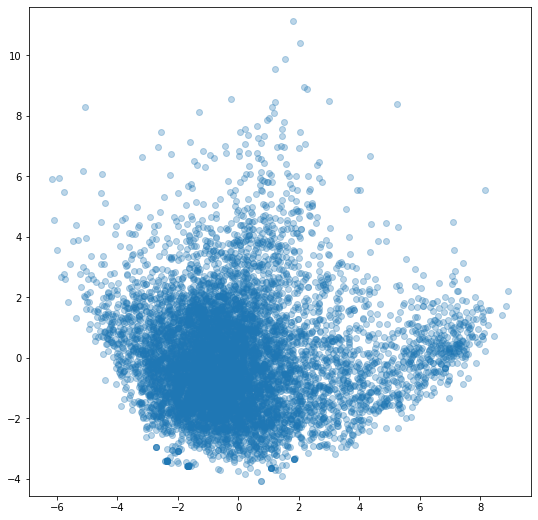

In [151]:
fig, ax = plt.subplots(figsize=[9,9])
ax.axis('equal')

ax.scatter(comp[:,0], comp[:,1], alpha=.3)

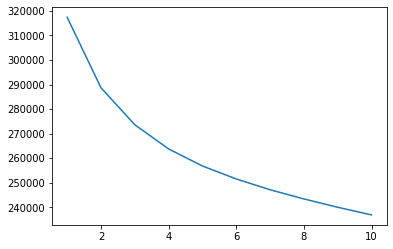

In [152]:
K = range(1,11)
sum_squared_distance = []

for k in K:
  kmeans = KMeans(n_clusters=k)
#   kmeans.fit(quant_nonull.drop('qid', axis=1))
  kmeans.fit(comp)
  sum_squared_distance.append(kmeans.inertia_)

plt.plot(K, sum_squared_distance)

In [202]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(comp[:,0:20])

KMeans(n_clusters=2)

(1656, 4)
(6483, 4)
(0, 4)


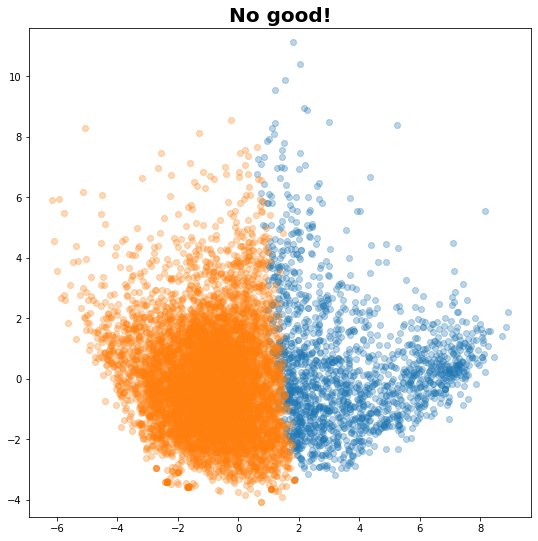

In [203]:
kf = pd.DataFrame({'pc1':comp[:,0], 'pc2':comp[:,1], 'pc3':comp[:,2], 'clus':kmeans.labels_}, index=quant_nonull['qid'])
kf1 = kf[kf['clus'] == 0]
kf2 = kf[kf['clus'] == 1]
kf3 = kf[kf['clus'] == 2]

fig, ax = plt.subplots(figsize=[9,9])
ax.axis('equal')

ax.scatter(kf1['pc1'], kf1['pc2'], alpha=.3)
ax.scatter(kf2['pc1'], kf2['pc2'], alpha=.3)
ax.scatter(kf3['pc1'], kf3['pc2'], alpha=.3)

print(kf1.shape)
print(kf2.shape)
print(kf3.shape)

ax.set_title('No good!', fontsize=20, fontweight='bold')

plt.show()

In [155]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [433]:
k = 2

spec = AgglomerativeClustering(n_clusters=k)
spec.fit(comp[:,0:5])

AgglomerativeClustering()

(6964, 4)
(1175, 4)


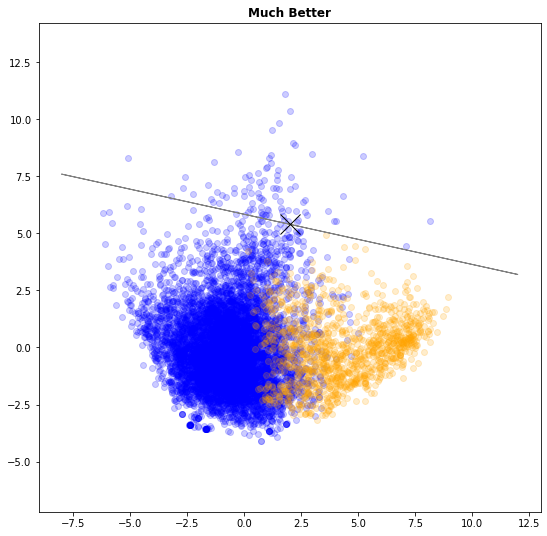

In [504]:
kf = pd.DataFrame({'pc1':comp[:,0], 'pc2':comp[:,1], 'pc3':comp[:,2], 'clus':spec.labels_}, index=quant_nonull['qid'])

kf_by_clus = []

for clus in range(k):
    kf_by_clus.append(kf[kf['clus'] == clus])

fig, ax = plt.subplots(figsize=[9,9])
ax.axis('equal')

colors = ['blue', 'orange', 'green']

center = np.array([2,5.4])
zero_theta = np.array([-10,2.2])
    
ax.arrow(center[0], center[1], zero_theta[0], zero_theta[1], color='grey')
ax.arrow(center[0], center[1], -zero_theta[0], -zero_theta[1], color='grey')
ax.plot(center[0], center[1], marker='x', markersize=20, color='black')

for clus in range(k):
    ax.scatter(kf_by_clus[clus]['pc1'], kf_by_clus[clus]['pc2'], alpha=.2, color=colors[clus])
    print(kf_by_clus[clus].shape)

ax.set_title('Much Better', fontweight='bold')

plt.show()

In [458]:
test = np.array([10,3])

money = test - center

print(money)
np.arccos(np.dot(money, zero_theta)/(np.linalg.norm(money)*np.linalg.norm(zero_theta)))

[ 8.  -2.4]


3.104503917665187

In [459]:
def calc_angle(x, y, against=zero_theta):
    point = np.array([x,y]) - center
    return np.arccos(np.dot(point, against)/(np.linalg.norm(point)*np.linalg.norm(against)))

In [460]:
calc_angle(0,10)

0.9063009277001397

In [461]:
kf = kf.reset_index()

In [462]:
kf.head()

,qid,pc1,pc2,pc3,clus
0,0,-0.273071,-1.425033,0.610968,0
1,8,1.592004,-0.662571,1.439375,0
2,16,-3.529339,2.597325,-0.713848,0
3,17,3.439426,0.110564,1.600292,1
4,30,1.217626,4.602077,-1.513538,0


In [463]:
# After struggling to merge these dataframes I finally realized
# there are multiple cases of many of the IDs. Let me go back to the top
# and reindex.

clus_and_id['qid'].value_counts()

161        11
49         11
695        10
559        10
56         10
           ..
7731597     1
7729596     1
7711171     1
7707081     1
7692509     1
Name: qid, Length: 2385, dtype: int64

In [464]:
df_personal['qid'].value_counts()

2047     1
645      1
12931    1
8833     1
10880    1
        ..
5432     1
11567    1
9518     1
13612    1
0        1
Name: qid, Length: 14809, dtype: int64

In [465]:
df_personal_clus = kf.merge(df_personal, on='qid')
df_personal_clus.shape

(8139, 20)

In [466]:
df_personal_clus.head()

,qid,pc1,pc2,pc3,clus,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income,participate,why_par,why_not_par
0,0,-0.273071,-1.425033,0.610968,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
1,8,1.592004,-0.662571,1.439375,0,28,Male,Elementary,Yes,Private sector employee,Bachelor,NaN,Other,No,Yes,17000.0,17000.0,"Yes, I did",Because everyone was participating in these de...,NaN
2,16,-3.529339,2.597325,-0.713848,0,22,Male,Prepartory/Basic,No,Unemployed,Bachelor,NaN,Owned,No,Yes,NaN,NaN,"No, I did not",NaN,I did not care to participate / It was not imp...
3,17,3.439426,0.110564,1.600292,1,39,Female,BA,Yes,Director of an institution or a high ranking g...,Bachelor,NaN,Owned,Yes,Yes,80000.0,120000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
4,30,1.217626,4.602077,-1.513538,0,29,Male,Prepartory/Basic,No,Unemployed,Bachelor,NaN,Owned with mortgage payments to a bank,No,No,NaN,50000.0,"No, I did not",NaN,I did not care to participate / It was not imp...


In [467]:
print('Chi2 p-values - Cluster against:')

for col in df_personal_clus.loc[:,'age':'computer']:
    print('')
    print(col, '\n\tp =', stats.chi2_contingency(pd.crosstab(df_personal_clus['clus'], df_personal_clus[col]))[1])

Chi2 p-values - Cluster against:

age 
	p = 3.187776633207028e-30

sex 
	p = 0.0029330392012790756

education 
	p = 8.268144390913795e-16

work? 
	p = 2.485895855518467e-13

occupation 
	p = 5.158178395192376e-56

mar_status 
	p = 2.010976646044163e-11

spouse_job 
	p = 1.0760483158555642e-10

housing 
	p = 0.0002683523471790451

car 
	p = 1.0425940759329725e-16

computer 
	p = 4.959308089923442e-10


<AxesSubplot:xlabel='why_not_par'>

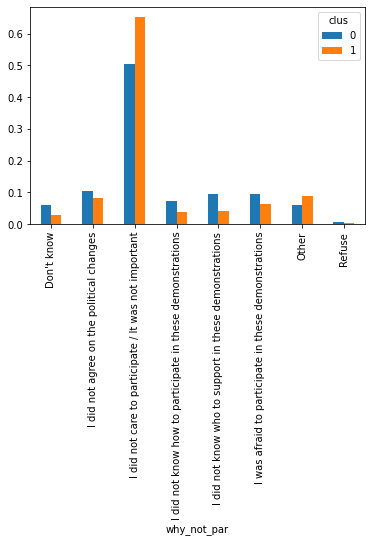

In [506]:
pd.crosstab(df_personal_clus['why_not_par'], df_personal_clus['clus'], normalize='columns').plot(kind='bar')

In [469]:
df_personal_clus.insert(loc=df_personal_clus.columns.get_loc('pc3'), 
                       column='radius',
                       value=((df_personal_clus['pc1']-2)**2 + (df_personal_clus['pc2']-5.4)**2)**(1/2))
df_personal_clus.head()

,qid,pc1,pc2,radius,pc3,clus,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income,participate,why_par,why_not_par
0,0,-0.273071,-1.425033,7.193603,0.610968,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
1,8,1.592004,-0.662571,6.076284,1.439375,0,28,Male,Elementary,Yes,Private sector employee,Bachelor,NaN,Other,No,Yes,17000.0,17000.0,"Yes, I did",Because everyone was participating in these de...,NaN
2,16,-3.529339,2.597325,6.199079,-0.713848,0,22,Male,Prepartory/Basic,No,Unemployed,Bachelor,NaN,Owned,No,Yes,NaN,NaN,"No, I did not",NaN,I did not care to participate / It was not imp...
3,17,3.439426,0.110564,5.481795,1.600292,1,39,Female,BA,Yes,Director of an institution or a high ranking g...,Bachelor,NaN,Owned,Yes,Yes,80000.0,120000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
4,30,1.217626,4.602077,1.117493,-1.513538,0,29,Male,Prepartory/Basic,No,Unemployed,Bachelor,NaN,Owned with mortgage payments to a bank,No,No,NaN,50000.0,"No, I did not",NaN,I did not care to participate / It was not imp...


In [470]:
pd.cut(df_personal_clus['radius'], bins=4)

0       (5.008, 7.434]
1       (5.008, 7.434]
2       (5.008, 7.434]
3       (5.008, 7.434]
4       (0.145, 2.581]
             ...      
8134    (5.008, 7.434]
8135    (5.008, 7.434]
8136    (5.008, 7.434]
8137    (5.008, 7.434]
8138    (7.434, 9.861]
Name: radius, Length: 8139, dtype: category
Categories (4, interval[float64]): [(0.145, 2.581] < (2.581, 5.008] < (5.008, 7.434] < (7.434, 9.861]]

In [471]:
print('Chi2 p-values - Radius stratum against:')

for col in df_personal_clus.loc[:,'age':'computer']:
    print('')
    print(col, '\n\tp =', stats.chi2_contingency(pd.crosstab(pd.cut(df_personal_clus['radius'], bins=20), df_personal_clus[col]))[1])

Chi2 p-values - Radius stratum against:

age 
	p = 0.03794812377551972

sex 
	p = 0.6378534119949295

education 
	p = 1.0834972382469555e-26

work? 
	p = 0.0012103058550773649

occupation 
	p = 3.210855964711088e-05

mar_status 
	p = 0.011465373927137253

spouse_job 
	p = 0.00021865691339761274

housing 
	p = 0.07397328880677502

car 
	p = 0.00021231085480092392

computer 
	p = 1.8025719190351446e-14


In [472]:
df_personal_clus['age'] = df_personal_clus['age'].replace({np.NaN:0})
df_personal_clus['age'].isnull().sum()

0

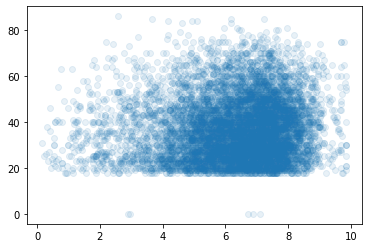

In [496]:
plt.scatter(df_personal_clus['radius'], df_personal_clus['age'].astype('float'), alpha=.1)

In [474]:
np.corrcoef(df_personal_clus['radius'], df_personal_clus['age'].astype('float'))

array([[1.        , 0.08072698],
       [0.08072698, 1.        ]])

<AxesSubplot:xlabel='why_par'>

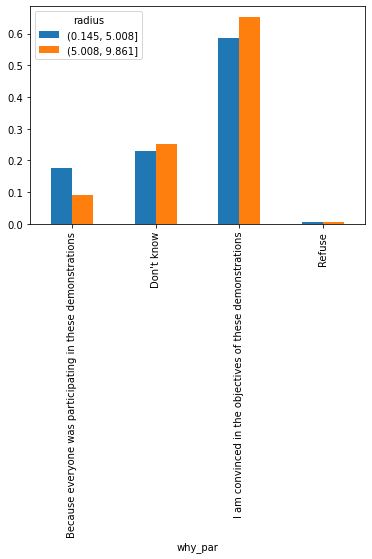

In [508]:
df_personal_clus['education'] = pd.Categorical(df_personal_clus['education'], categories=['Illiterate/No formal education',
                                                                               'Elementary',
                                                                               'Prepartory/Basic',
                                                                               'Secondary',
                                                                               'Mid-level diploma (professional or technical',
                                                                               'BA',
                                                                               'MA and above'], ordered=True)

pd.crosstab(df_personal_clus['why_par'], pd.cut(df_personal_clus['radius'], bins=2), normalize='columns').plot(kind='bar')

In [478]:
df_personal_clus['education'].value_counts().index

CategoricalIndex(['Secondary', 'Prepartory/Basic', 'BA', 'Elementary',
                  'Mid-level diploma (professional or technical',
                  'Illiterate/No formal education', 'MA and above'],
                 categories=['Illiterate/No formal education', 'Elementary', 'Prepartory/Basic', 'Secondary', 'Mid-level diploma (professional or technical', 'BA', 'MA and above'], ordered=True, dtype='category')

In [479]:
df_personal_clus.insert(loc=df_personal_clus.columns.get_loc('pc3'), 
                       column='angle',
                       value=0)

df_personal_clus.head(3)

,qid,pc1,pc2,radius,angle,pc3,clus,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income,participate,why_par,why_not_par
0,0,-0.273071,-1.425033,7.193603,0,0.610968,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
1,8,1.592004,-0.662571,6.076284,0,1.439375,0,28,Male,Elementary,Yes,Private sector employee,Bachelor,NaN,Other,No,Yes,17000.0,17000.0,"Yes, I did",Because everyone was participating in these de...,NaN
2,16,-3.529339,2.597325,6.199079,0,-0.713848,0,22,Male,Prepartory/Basic,No,Unemployed,Bachelor,NaN,Owned,No,Yes,NaN,NaN,"No, I did not",NaN,I did not care to participate / It was not imp...


In [480]:
angles = []

for index, row in df_personal_clus.iterrows():
    angles.append(calc_angle(row['pc1'], row['pc2']))
    
df_personal_clus['angle'] = angles
df_personal_clus.head(3)

,qid,pc1,pc2,radius,angle,pc3,clus,age,sex,education,work?,occupation,mar_status,spouse_job,housing,car,computer,income,household_income,participate,why_par,why_not_par
0,0,-0.273071,-1.425033,7.193603,1.503670,0.610968,0,40,Male,Prepartory/Basic,Yes,Private sector employee,Married,Housewife,Owned,Yes,No,19000.0,38000.0,"No, I did not",NaN,I did not care to participate / It was not imp...
1,8,1.592004,-0.662571,6.076284,1.757968,1.439375,0,28,Male,Elementary,Yes,Private sector employee,Bachelor,NaN,Other,No,Yes,17000.0,17000.0,"Yes, I did",Because everyone was participating in these de...,NaN
2,16,-3.529339,2.597325,6.199079,0.723499,-0.713848,0,22,Male,Prepartory/Basic,No,Unemployed,Bachelor,NaN,Owned,No,Yes,NaN,NaN,"No, I did not",NaN,I did not care to participate / It was not imp...


In [481]:
df_personal_clus['angle'].describe()

count    8139.000000
mean        1.467972
std         0.429390
min         0.020192
25%         1.225853
50%         1.414664
75%         1.639753
max         3.095948
Name: angle, dtype: float64

In [482]:
df_in_bowl = df_personal_clus[df_personal_clus['pc2'] < (df_personal_clus['pc1'] * (-.26) + 6)].copy()

In [483]:
df_in_bowl.shape

(8054, 22)

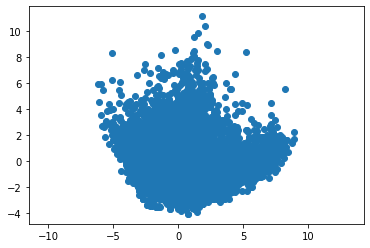

In [484]:
fig, ax = plt.subplots()
ax.axis('equal')

ax.scatter(df_personal_clus['pc1'], df_personal_clus['pc2'])

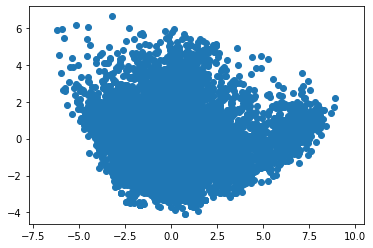

In [485]:
fig, ax = plt.subplots()
ax.axis('equal')

ax.scatter(df_in_bowl['pc1'], df_in_bowl['pc2'])

In [486]:
print('Chi2 p-values - Angle stratum against:')

for col in df_in_bowl.loc[:,'age':'computer']:
    print('')
    print(col, '\n\tp =', stats.chi2_contingency(pd.crosstab(pd.cut(df_in_bowl['angle'], bins=4), df_in_bowl[col]))[1])

Chi2 p-values - Angle stratum against:

age 
	p = 1.1524619685106994e-21

sex 
	p = 9.64404902707304e-06

education 
	p = 1.3387932040595414e-13

work? 
	p = 1.4012104134762325e-10

occupation 
	p = 2.9796471013667343e-65

mar_status 
	p = 2.369856488856242e-17

spouse_job 
	p = 4.0284309986242255e-15

housing 
	p = 0.004137199339363722

car 
	p = 4.900835035951401e-23

computer 
	p = 1.479694420642102e-08


In [487]:
df_in_bowl['angle'].describe()

count    8054.000000
mean        1.473747
std         0.420178
min         0.020192
25%         1.230946
50%         1.416650
75%         1.640638
max         3.095948
Name: angle, dtype: float64

<AxesSubplot:xlabel='occupation'>

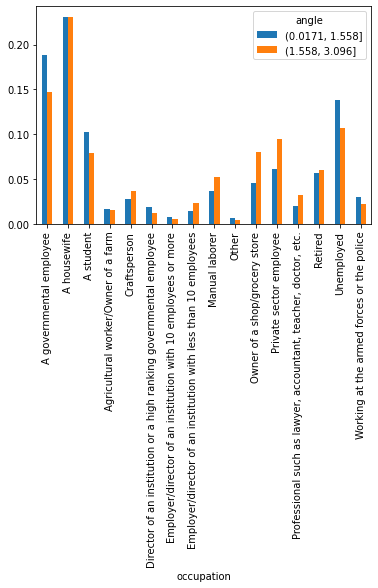

In [489]:
df_in_bowl['education'] = pd.Categorical(df_in_bowl['education'], categories=['Illiterate/No formal education',
                                                                               'Elementary',
                                                                               'Prepartory/Basic',
                                                                               'Secondary',
                                                                               'Mid-level diploma (professional or technical',
                                                                               'BA',
                                                                               'MA and above'], ordered=True)

pd.crosstab(df_in_bowl['occupation'], pd.cut(df_in_bowl['angle'], bins=2), normalize='columns').plot(kind='bar')

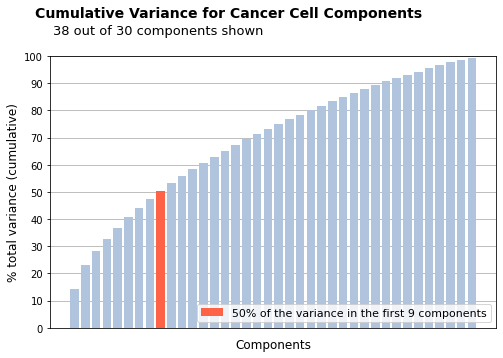

In [104]:
cum_variance_percent = np.cumsum(pca.explained_variance_ratio_)*100

fig, ax = plt.subplots(figsize=[8,5])

fig.set_facecolor('white')

ax.set_xlabel('Components', fontsize=12, labelpad=10)
ax.set_xticks([])
ax.set_ylabel('% total variance (cumulative)', fontsize=12)
ax.set_ylim([0,100])
ax.set_yticks([t*10 for t in range(11)])


#### Try changing these values! Control how many components are shown in the graph,
#### and what threshold percentage we want to check.

show = 38   
percent_thresh = 50

####
####

# Main bars
rects = ax.bar(x=[num for num in range(show)], height=cum_variance_percent[:show], color='lightsteelblue', zorder=100)

# Function to determine the point at which the threshold is passed
def percent_of_variance(rects, percent):
  for i in range(len(rects)):
    if rects[i].get_height() > percent:
      return i

# Run function and print tomato bar.
first = percent_of_variance(rects, percent_thresh)
thresh = ax.bar(x=first, height=cum_variance_percent[first], color='tomato', zorder=200)

ax.set_title('Cumulative Variance for Cancer Cell Components', fontsize=14, fontweight='bold', x=.4, y=1.12)
ax.text(s=str(show) + ' out of 30 components shown', x=-2, y=108, fontsize=13)

ax.grid(b=True, axis='y')
ax.legend([thresh],[str(percent_thresh) + '% of the variance in the first ' + str(first+1) + ' components'], loc='lower right', fontsize=11).set_zorder(300)

plt.show()